# 1.Loading libraries and Dataset

In [1125]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import statsmodels
import statsmodels.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

##### This dataset is the rolling sales data from "nyc.gov" The Department of Finance. It shows the properties that sold from November 2017 to October 2018 in Manhattan. 

In [1110]:
#Read Dataset
df = pd.read_csv('rolling sales manhattan.csv',header=None)

In [1111]:
#Check Dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,Manhattan Rolling Sales File. All Sales From ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sales File as of 11/10/2018 Co-op Sales File ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Neighborhood Names and Descriptive Data as 11/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


# 2. Data Cleaning

In [1112]:
#Drop unnecessary columns and rows
header = df.iloc[4]
df = df.rename(columns = header)

In [1113]:
df.drop([0,1,2,3,4])

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
5,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,1,0,1,987,2183,1860,1,A4,4844809,05/22/2018
6,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,1,0,1,987,2183,1860,1,A4,0,05/23/2018
7,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,,B1,113 AVENUE C,,...,2,0,2,1218,4764,1899,1,B1,0,04/25/2018
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,,C7,21-23 AVENUE B,,...,12,4,16,4186,10588,1900,2,C7,10350000,09/07/2018
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,,C1,200 EAST 7TH STREET,,...,18,0,18,2271,10650,1910,2,C1,5000000,09/05/2018
10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,390,54,,C3,203 EAST 7TH STREET,,...,4,0,4,1950,5446,2001,2,C3,6250000,05/09/2018
11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,390,64,,C4,187 EAST 7TH STREET,,...,8,2,10,1642,5220,1910,2,C4,2400000,05/18/2018
12,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,392,22,,C4,374 EAST 10TH STREET,,...,17,0,17,4614,20599,1900,2,C4,0,06/28/2018
13,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,392,27,,C4,384 EAST 10TH STREET,,...,45,0,45,9234,49799,1900,2,C4,0,06/28/2018
14,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,392,48,,C1,627 EAST 9TH STREET,,...,35,0,35,9227,43871,1900,2,C1,0,06/28/2018


In [841]:
#shape of dataset
df.shape

(16842, 21)

In [842]:
#description of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16842 entries, 0 to 16841
Data columns (total 21 columns):
BOROUGH                           16842 non-null object
NEIGHBORHOOD                      16838 non-null object
BUILDING CLASS CATEGORY           16838 non-null object
TAX CLASS AT PRESENT              16838 non-null object
BLOCK                             16838 non-null object
LOT                               16838 non-null object
EASE-MENT                         16838 non-null object
BUILDING CLASS AT PRESENT         16838 non-null object
ADDRESS                           16838 non-null object
APARTMENT NUMBER                  16838 non-null object
ZIP CODE                          16838 non-null object
RESIDENTIAL UNITS                 16838 non-null object
COMMERCIAL UNITS                  16838 non-null object
TOTAL UNITS                       16838 non-null object
LAND SQUARE FEET                  16838 non-null object
GROSS SQUARE FEET                 16838 non-null ob

In [1114]:
#Convert some columns to appropriate datatype
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CKASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'],errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'],errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'],errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'],errors='coerce')
df['BOROUGH'] = pd.to_numeric(df['BOROUGH'],errors='coerce')
df['BOROUGH'] = df['BOROUGH'].astype('category')
df['BLOCK'] = pd.to_numeric(df['BLOCK'],errors='coerce')
df['LOT'] = pd.to_numeric(df['LOT'],errors='coerce')
df['ZIP CODE'] = pd.to_numeric(df['ZIP CODE'],errors='coerce')
df['RESIDENTIAL UNITS'] = pd.to_numeric(df['RESIDENTIAL UNITS'],errors='coerce')
df['TOTAL UNITS'] = pd.to_numeric(df['TOTAL UNITS'],errors='coerce')
df['COMMERCIAL UNITS'] = pd.to_numeric(df['COMMERCIAL UNITS'],errors='coerce')
df['YEAR BUILT'] = pd.to_numeric(df['YEAR BUILT'],errors='coerce')


In [844]:
#Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16842 entries, 0 to 16841
Data columns (total 22 columns):
BOROUGH                           16837 non-null category
NEIGHBORHOOD                      16838 non-null object
BUILDING CLASS CATEGORY           16838 non-null object
TAX CLASS AT PRESENT              16838 non-null object
BLOCK                             16837 non-null float64
LOT                               16837 non-null float64
EASE-MENT                         16838 non-null object
BUILDING CLASS AT PRESENT         16838 non-null object
ADDRESS                           16838 non-null object
APARTMENT NUMBER                  16838 non-null object
ZIP CODE                          16837 non-null float64
RESIDENTIAL UNITS                 16837 non-null float64
COMMERCIAL UNITS                  16837 non-null float64
TOTAL UNITS                       16837 non-null float64
LAND SQUARE FEET                  16837 non-null float64
GROSS SQUARE FEET                 16837 no

In [715]:
#Check missing values
df.columns[df.isnull().any()]

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'TAX CKASS AT PRESENT'],
      dtype='object')

In [1115]:
missing = df.isnull().sum()/len(df)
missing = missing[missing>0]
missing.sort_values(inplace = True)
missing

TAX CKASS AT PRESENT              0.000238
NEIGHBORHOOD                      0.000238
BUILDING CLASS CATEGORY           0.000238
TAX CLASS AT PRESENT              0.000238
BUILDING CLASS AT TIME OF SALE    0.000238
EASE-MENT                         0.000238
BUILDING CLASS AT PRESENT         0.000238
ADDRESS                           0.000238
APARTMENT NUMBER                  0.000238
TAX CLASS AT TIME OF SALE         0.000238
SALE PRICE                        0.000297
YEAR BUILT                        0.000297
GROSS SQUARE FEET                 0.000297
LAND SQUARE FEET                  0.000297
BOROUGH                           0.000297
COMMERCIAL UNITS                  0.000297
RESIDENTIAL UNITS                 0.000297
SALE DATE                         0.000297
LOT                               0.000297
BLOCK                             0.000297
TOTAL UNITS                       0.000297
ZIP CODE                          0.000297
dtype: float64

In [1116]:
missing=missing.to_frame()
missing.columns=['count']
missing.index.names=['Name']
missing['Name']=missing.index
missing.head()

,count,Name
Name,,
TAX CKASS AT PRESENT,0.000238,TAX CKASS AT PRESENT
NEIGHBORHOOD,0.000238,NEIGHBORHOOD
BUILDING CLASS CATEGORY,0.000238,BUILDING CLASS CATEGORY
TAX CLASS AT PRESENT,0.000238,TAX CLASS AT PRESENT
BUILDING CLASS AT TIME OF SALE,0.000238,BUILDING CLASS AT TIME OF SALE


<module 'seaborn' from '/anaconda3/lib/python3.7/site-packages/seaborn/__init__.py'>

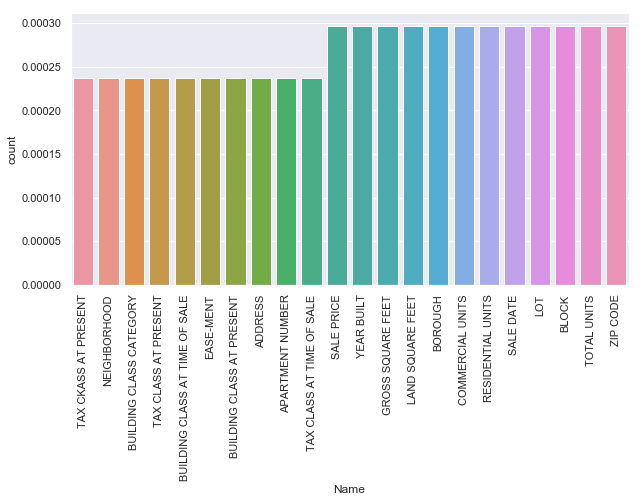

In [824]:
#Plot the missing values
sns.set(style='darkgrid', color_codes=True)
sns.barplot(x='Name',y='count',data=missing)
plt.xticks(rotation=90)
sns

In [1086]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16837 entries, 5 to 16841
Data columns (total 20 columns):
NEIGHBORHOOD                      16837 non-null object
BUILDING CLASS CATEGORY           16837 non-null object
TAX CLASS AT PRESENT              16837 non-null object
BLOCK                             16837 non-null float64
LOT                               16837 non-null float64
BUILDING CLASS AT PRESENT         16837 non-null object
ADDRESS                           16837 non-null object
APARTMENT NUMBER                  16837 non-null object
ZIP CODE                          16837 non-null float64
RESIDENTIAL UNITS                 16837 non-null float64
COMMERCIAL UNITS                  16837 non-null float64
TOTAL UNITS                       16837 non-null float64
LAND SQUARE FEET                  16837 non-null float64
GROSS_SQUARE_FEET                 16837 non-null float64
YEAR BUILT                        16837 non-null float64
TAX CLASS AT TIME OF SALE         16837 no

##### We can see that there are not a lot of missing values according to the missing values proportion in each column. I will drop the columns that are not relevant in the coming analysis:
* BOROUGH
* EASE-MENT
##### In order to deal with the missing values in other columns, I will fill them up with their mean values. After that, we will try to predict the value of SALE PRICE as test data.

In [1117]:
#Delete columns
del df['BOROUGH']
del df['EASE-MENT']

In [1119]:
#Fill some missing values with mean values
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())

# 3.Data Inspection & Visualization

In [1123]:
#Split dataset
df1 = df[df['SALE PRICE'].isna()]
df2 = df[~df['SALE PRICE'].isna()]

In [1124]:
df1 = df1.drop(columns='SALE PRICE')

In [720]:
#Print first 5 rows of df1
print(df1.shape)
df1.head()

(5, 21)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,TAX CKASS AT PRESENT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,NaN,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,NaN,NaN,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,NaN,NaN,NaN,NaN,NaN,NaN,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,NaT,TAX CLASS AT PRESENT


In [847]:
#Print first 5 rows of df2
print(df2.shape)
df2.head()

(16837, 22)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,TAX CKASS AT PRESENT
5,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390.0,61.0,,A4,189 EAST 7TH STREET,,...,0.0,1.0,987.0,2183.0,1860.0,1,A4,4844809.0,2018-05-22,1
6,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390.0,61.0,,A4,189 EAST 7TH STREET,,...,0.0,1.0,987.0,2183.0,1860.0,1,A4,0.0,2018-05-23,1
7,1.0,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390.0,35.0,,B1,113 AVENUE C,,...,0.0,2.0,1218.0,4764.0,1899.0,1,B1,0.0,2018-04-25,1
8,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385.0,2.0,,C7,21-23 AVENUE B,,...,4.0,16.0,4186.0,10588.0,1900.0,2,C7,10350000.0,2018-09-07,2
9,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389.0,18.0,,C1,200 EAST 7TH STREET,,...,0.0,18.0,2271.0,10650.0,1910.0,2,C1,5000000.0,2018-09-05,2


In [722]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16837 entries, 5 to 16841
Data columns (total 22 columns):
BOROUGH                           16837 non-null category
NEIGHBORHOOD                      16837 non-null object
BUILDING CLASS CATEGORY           16837 non-null object
TAX CLASS AT PRESENT              16837 non-null object
BLOCK                             16837 non-null float64
LOT                               16837 non-null float64
EASE-MENT                         16837 non-null object
BUILDING CLASS AT PRESENT         16837 non-null object
ADDRESS                           16837 non-null object
APARTMENT NUMBER                  16837 non-null object
ZIP CODE                          16837 non-null float64
RESIDENTIAL UNITS                 16837 non-null float64
COMMERCIAL UNITS                  16837 non-null float64
TOTAL UNITS                       16837 non-null float64
LAND SQUARE FEET                  16837 non-null float64
GROSS SQUARE FEET                 16837 no

#### By making a heatmap of the correlation relationship of all the numerical features in the dataset, we can see how close they relate to each other.

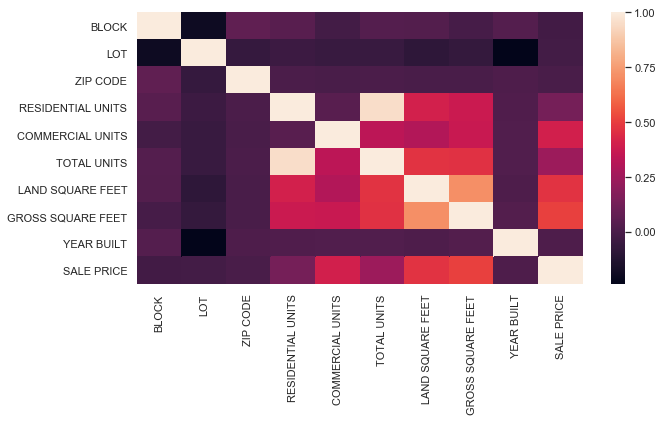

In [723]:
corr=df2.corr()
sns.heatmap(corr)

In [592]:
corr.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BLOCK,1.0,-0.19,0.067,0.043,-0.02,0.034,0.03,-0.01,0.034,-0.025
LOT,-0.19,1.0,-0.065,-0.042,-0.051,-0.053,-0.086,-0.066,-0.24,-0.019
ZIP CODE,0.067,-0.065,1.0,0.003,0.00075,0.0031,0.00036,0.0017,0.013,9e-05
RESIDENTIAL UNITS,0.043,-0.042,0.003,1.0,0.042,0.96,0.41,0.38,0.021,0.13
COMMERCIAL UNITS,-0.02,-0.051,0.00075,0.042,1.0,0.33,0.31,0.37,0.022,0.4
TOTAL UNITS,0.034,-0.053,0.0031,0.96,0.33,1.0,0.47,0.46,0.024,0.24
LAND SQUARE FEET,0.03,-0.086,0.00036,0.41,0.31,0.47,1.0,0.71,0.015,0.47
GROSS SQUARE FEET,-0.01,-0.066,0.0017,0.38,0.37,0.46,0.71,1.0,0.029,0.51
YEAR BUILT,0.034,-0.24,0.013,0.021,0.022,0.024,0.015,0.029,1.0,0.016
SALE PRICE,-0.025,-0.019,9e-05,0.13,0.4,0.24,0.47,0.51,0.016,1.0


##### Here, we pay attention to the last row of this graph. It represents the correlation of different features with SALE PRICE.

In [868]:
#numeric correlation
corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
GROSS SQUARE FEET    0.506209
LAND SQUARE FEET     0.467379
COMMERCIAL UNITS     0.402122
TOTAL UNITS          0.239842
RESIDENTIAL UNITS    0.129129
YEAR BUILT           0.015839
ZIP CODE             0.000090
LOT                 -0.019306
BLOCK               -0.024947
Name: SALE PRICE, dtype: float64

In [848]:
numeric_df2=df2.select_dtypes(include=[np.number])
numeric_df2.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,16837.000000,16837.000000,16837.000000,16837.000000,16837.000000,16837.000000,16837.000000,1.683700e+04,16837.000000,1.683700e+04
mean,1129.347984,766.327196,10013.625349,1.695195,0.260735,1.998515,523.337174,2.895025e+03,1705.765754,2.932039e+06
std,530.522810,942.235779,410.436584,12.507127,3.871138,13.241719,3826.566571,3.229759e+04,649.564809,2.694797e+07
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,796.000000,29.000000,10013.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1910.000000,1.600000e+05
50%,1171.000000,1003.000000,10022.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,1933.000000,8.175000e+05
75%,1464.000000,1203.000000,10028.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,1975.000000,1.847500e+06
max,2250.000000,9101.000000,10463.000000,597.000000,229.000000,601.000000,191502.000000,2.224200e+06,2018.000000,2.397502e+09


### SALE PRICE

#### Below is the boxplot of SALE PRICE, we can see the distribution of the properties SALE PRICE in manhattan as well as where the outliers' values are.

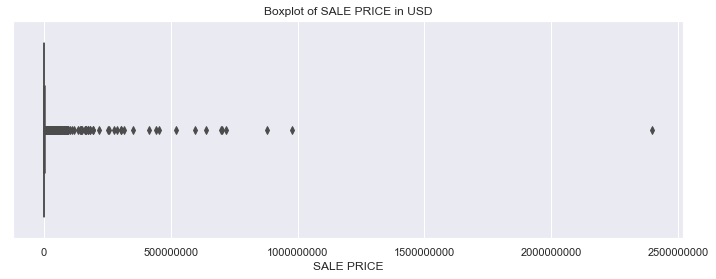

In [849]:
#SALE PRICE BOXPLOT
plt.figure(figsize=(12,4))

sns.boxplot(x='SALE PRICE', data=df2)
plt.ticklabel_format(style='plain',axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

#### Below is the top 10 SALE PRICE of proporties in Manhattan in the past year. We can see that most of the proporties are office buildings, and all of their TAX CLASS AT PRESENT are 4. The most expensive proporty is located at CHELSEA and sold at the price of  $2,397,502,000.

In [870]:
SP10=df2.sort_values(by=['SALE PRICE'],ascending=False)
SP10=SP10.head(10)
SP10

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,TAX CKASS AT PRESENT
806,CHELSEA,21 OFFICE BUILDINGS,4,713.0,1.0,O6,75 9 AVENUE,,0.0,167.0,167.0,165200.0,1100533.0,1905.0,4,O6,2.397502e+09,2018-03-20,4
15102,UPPER WEST SIDE (59-79),34 THEATRES,4,1119.0,61.0,J6,149 COLUMBUS AVENUE,,0.0,1.0,1.0,15059.0,99769.0,1978.0,4,J6,9.800000e+08,2018-06-15,4
804,CHELSEA,21 OFFICE BUILDINGS,4,673.0,1.0,O3,261 11TH AVENUE,,0.0,42.0,42.0,136000.0,1129200.0,1912.0,4,O3,8.800000e+08,2018-10-23,4
8393,MIDTOWN WEST,25 LUXURY HOTELS,4,1000.0,1.0,H1,701 7 AVENUE,,0.0,4.0,4.0,16066.0,369864.0,1909.0,4,H1,7.191000e+08,2018-04-27,4
6572,MIDTOWN CBD,21 OFFICE BUILDINGS,4,1298.0,23.0,O4,425 LEXINGTON AVENUE,,0.0,42.0,42.0,35145.0,627691.0,1987.0,4,O4,7.010000e+08,2018-10-30,4
9542,SOHO,43 CONDO OFFICE BUILDINGS,4,596.0,1101.0,RB,550 WASHINGTON STREET,UNIT A,0.0,0.0,1.0,0.0,0.0,1933.0,4,RB,7.000000e+08,2018-01-31,4
8375,MIDTOWN WEST,21 OFFICE BUILDINGS,4,993.0,29.0,O4,5 BRYANT PARK,,0.0,95.0,95.0,27200.0,654137.0,1958.0,4,O4,6.400000e+08,2018-05-23,4
8434,MIDTOWN WEST,43 CONDO OFFICE BUILDINGS,4,1027.0,1502.0,RB,1731 BROADWAY,2,0.0,0.0,1.0,0.0,0.0,0.0,4,RB,5.956289e+08,2018-05-24,4
8374,MIDTOWN WEST,21 OFFICE BUILDINGS,4,993.0,11.0,O4,1440 BROADWAY,,0.0,44.0,44.0,30200.0,747576.0,1924.0,4,O4,5.200000e+08,2017-12-19,4
8378,MIDTOWN WEST,21 OFFICE BUILDINGS,4,1025.0,25.0,O4,1700 BROADWAY,,0.0,36.0,36.0,30150.0,596559.0,1968.0,4,O4,4.530500e+08,2018-01-24,4


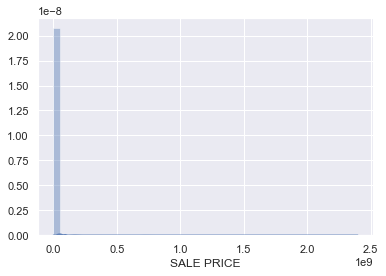

In [353]:
sns.distplot(df2['SALE PRICE'])

In [364]:
#Remove outliers
df3 = df2[(df2['SALE PRICE'] > 500000) & (df2['SALE PRICE'] < 50000000)]

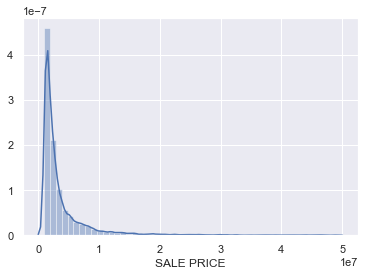

In [365]:
sns.distplot(df3['SALE PRICE'])

In [871]:
#skewness of SALE PRICE
df2['SALE PRICE'].skew()

53.261959940661434

##### With the skewness of 53.26, SALE PRICE is highly right skewed. To get better results, I will log transform SALE PRICE below.

-3.7592973660364684


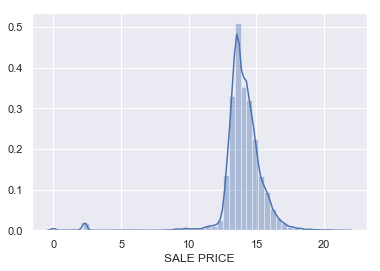

In [449]:
df2sp = df2['SALE PRICE'].loc[(df2['SALE PRICE']!=0)]
saleslog=np.log(df2sp)
print(saleslog.skew())
sns.distplot(saleslog)

## Visualization of Numerical Data

#### GROSS SQUARE FEET & LAND SQAURE FEET

In [457]:
df2gsq = df2.loc[(df2['GROSS SQUARE FEET']!=0)]

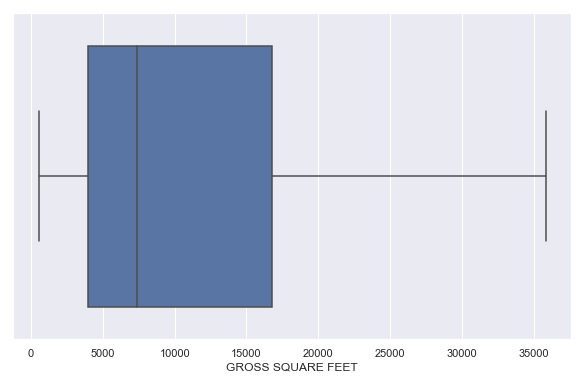

In [459]:
#SQUARE FEET
plt.figure(figsize=(10,6))
sns.boxplot(x='GROSS SQUARE FEET', data=df2gsq, showfliers=False)

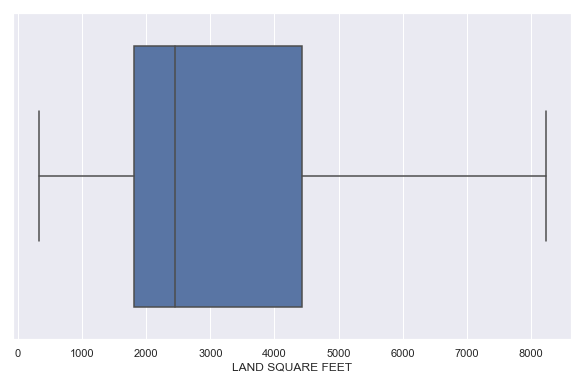

In [461]:
df2lsq = df2.loc[(df2['LAND SQUARE FEET']!=0)]
plt.figure(figsize=(10,6))
sns.boxplot(x='LAND SQUARE FEET', data=df2lsq, showfliers=False)

In [472]:
df2gsq2 = df2gsq[df2gsq['GROSS SQUARE FEET'] < 15500]
df2lsq2 = df2lsq[df2lsq['LAND SQUARE FEET'] < 4500]


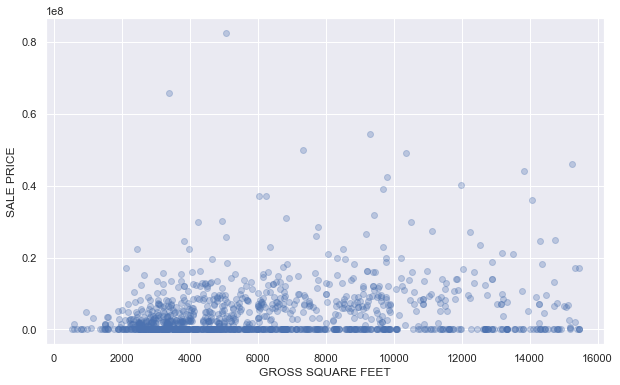

In [473]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET',y='SALE PRICE',data=df2gsq2, fit_reg=False,scatter_kws={'alpha':0.3})

#### The scatter plot above shows that there exists some SALE PRICE which equals 0. I will remove the SALE PRICE that equals 0 and make another scatter plot below to see clearer the correlation between GROSS SQUARE FEET and SALE PRICE.

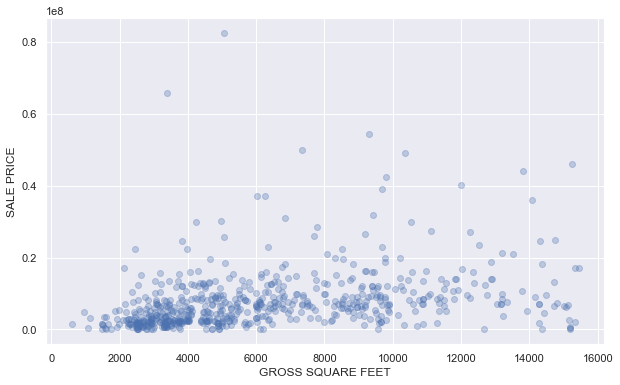

In [476]:
plt.figure(figsize=(10,6))
df2gsq2 = df2gsq2.loc[(df2gsq2['SALE PRICE']!=0)]
sns.regplot(x='GROSS SQUARE FEET',y='SALE PRICE',data=df2gsq2, fit_reg=False,scatter_kws={'alpha':0.3})

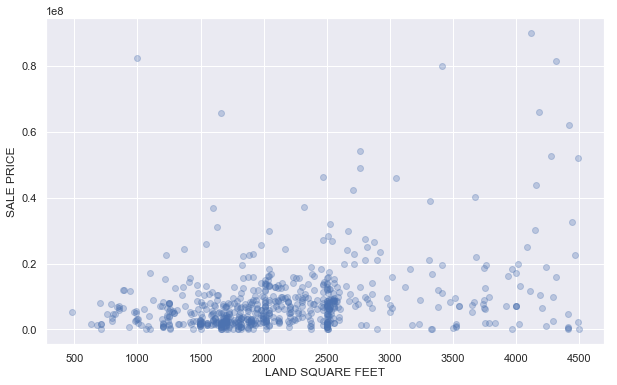

In [478]:
plt.figure(figsize=(10,6))
df2lsq2 = df2lsq2.loc[(df2lsq2['SALE PRICE']!=0)]
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df2lsq2, fit_reg=False, scatter_kws={'alpha':0.3})

#### TOTAL UNITS

In [606]:
df2[['TOTAL UNITS','SALE PRICE']].groupby(['TOTAL UNITS']).count().sort_values(by='SALE PRICE', ascending=False).head()


,SALE PRICE
TOTAL UNITS,
1.0,8190
0.0,7300
2.0,187
3.0,119
4.0,111


In [489]:
#Remove rows with TOTAL UNITS == 0 
df2tu = df2[(df2['TOTAL UNITS']>0)]

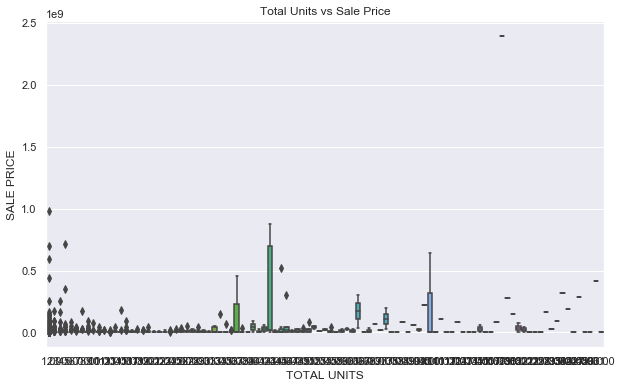

In [490]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE',data=df2tu)
plt.title('Total Units vs Sale Price')
plt.show()

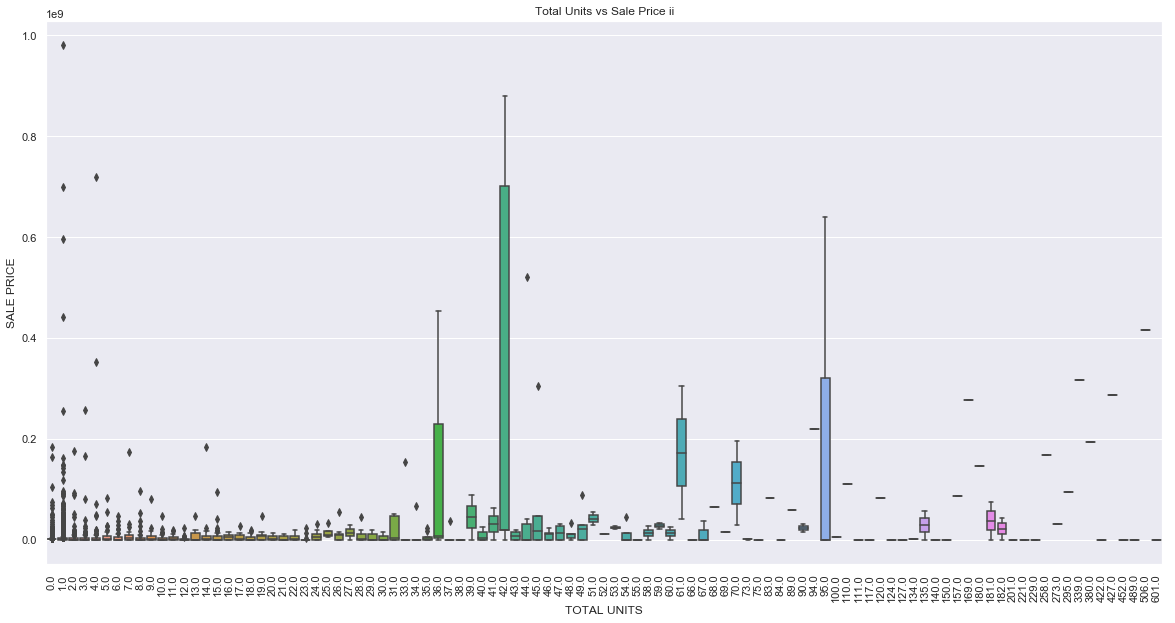

In [495]:
df2tu = df2[(df2['SALE PRICE']<1100000000)]
plt.figure(figsize=(20,10))
sns.boxplot(x='TOTAL UNITS', y='SALE PRICE', data=df2tu)
plt.title('Total Units vs Sale Price ii')
plt.xticks(rotation=90)
plt.show()

#### COMMERICIAL UNITS

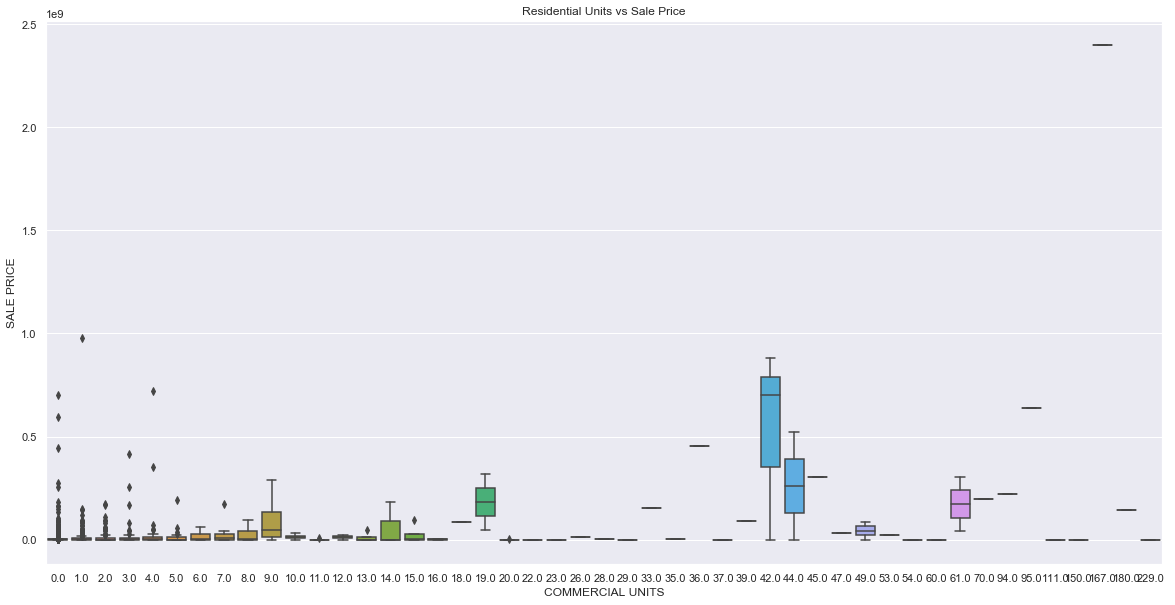

In [496]:
plt.figure(figsize=(20,10))
sns.boxplot(x='COMMERCIAL UNITS',y='SALE PRICE',data=df2)
plt.title('Residential Units vs Sale Price')
plt.show()

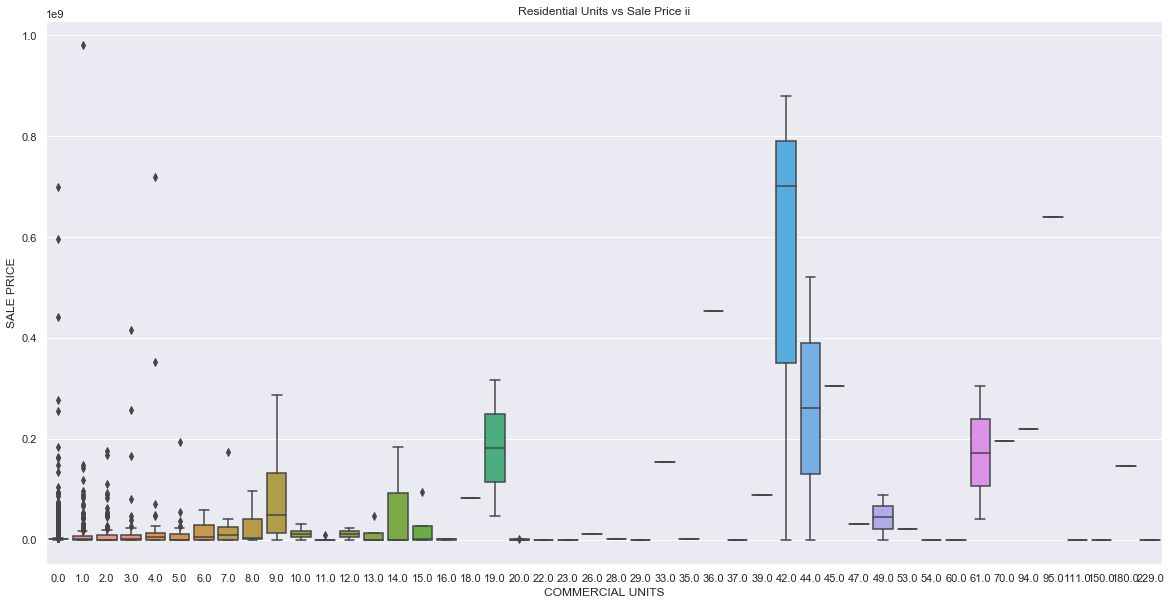

In [497]:
df2cu=df2[(df2['SALE PRICE']<1100000000)]
plt.figure(figsize=(20,10))
sns.boxplot(x='COMMERCIAL UNITS',y='SALE PRICE',data=df2cu)
plt.title('Residential Units vs Sale Price ii')
plt.show()

## Visualization of Categorical Data

In [498]:
#Visualization of Categorical Data
cat_data=df2.select_dtypes(exclude=[np.number])
cat_data.describe()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,TAX CKASS AT PRESENT
count,16837.0,16837,16837,16837,16837,16837,16837,16837,16837,16837,16837,16837
unique,1.0,39,43,10,1,127,10806,2418,4,125,314,10
top,1.0,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,,R4,1 WEST END AVENUE,,2,R4,2018-01-08 00:00:00,2
freq,16837.0,1874,6758,14243,16837,6758,118,8914,15256,6758,155,14243
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-31 00:00:00,NaN


#### NEIGHBORHOOD

In [500]:
#Neighborhood
df2['NEIGHBORHOOD'].unique()

array(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
       'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
       'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
       'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
       'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN CBD',
       'MIDTOWN EAST', 'MIDTOWN WEST', 'MORNINGSIDE HEIGHTS',
       'MURRAY HILL', 'ROOSEVELT ISLAND', 'SOHO', 'SOUTHBRIDGE',
       'TRIBECA', 'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
       'UPPER EAST SIDE (96-110)', 'UPPER WEST SIDE (59-79)',
       'UPPER WEST SIDE (79-96)', 'UPPER WEST SIDE (96-116)',
       'WASHINGTON HEIGHTS LOWER', 'WASHINGTON HEIGHTS UPPER'],
      dtype=object)

In [605]:
pivot=df2.pivot_table(index='NEIGHBORHOOD', values='SALE PRICE',aggfunc=np.median)
pivot.head()

,SALE PRICE
NEIGHBORHOOD,
ALPHABET CITY,545000.0
CHELSEA,999000.0
CHINATOWN,580402.5
CIVIC CENTER,2695000.0
CLINTON,762500.0


In [874]:
pivotn=pivot.sort_values(by=['SALE PRICE'],ascending=False)
pivotn1=pivotn.head(10)

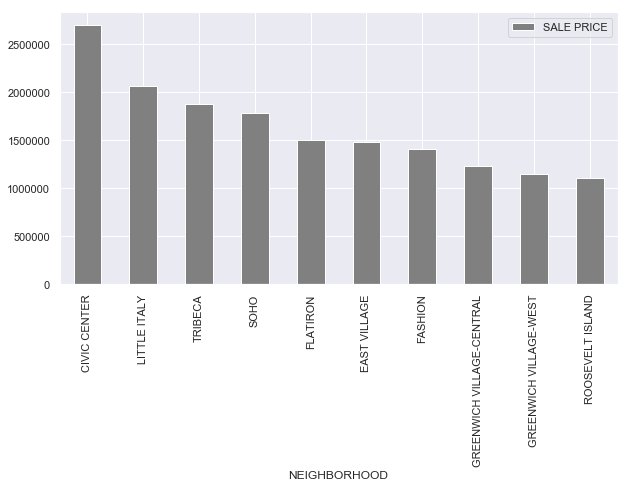

In [877]:
plt.rcParams['figure.figsize'] = [10, 5]
pivotn1.plot(kind='bar',color='grey')

#### BUILDING CLASS CATEGORY

In [879]:
#BUILDING CLASS CATEGORY
print(df2['BUILDING CLASS CATEGORY'].nunique())
pivot2=df2.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.median)
pivot2b=pivot2.sort_values(by=['SALE PRICE'],ascending=False)
pivot2bi=pivot2b.head(10)

43


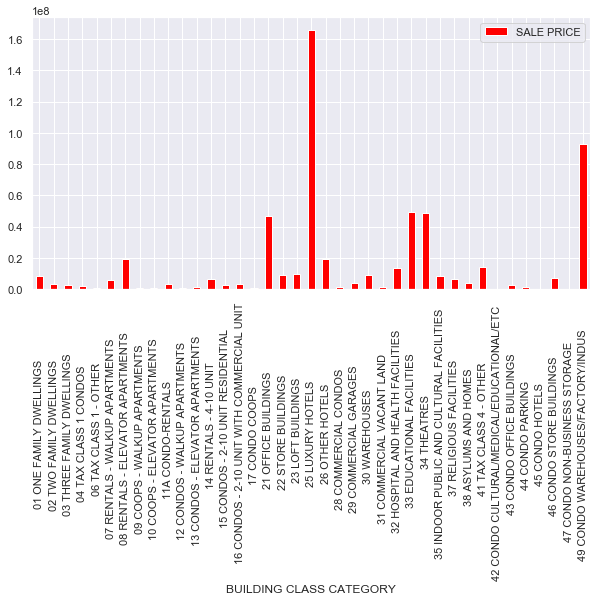

In [603]:
plt.rcParams['figure.figsize'] = [10, 5]
buildingc=df2[(df2['SALE PRICE'] !=0)]
buildingc['BUILDING CLASS CATEGORY'].nunique()
bccpivot=buildingc.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.median)
bccpivot.plot(kind='bar',color='Red')

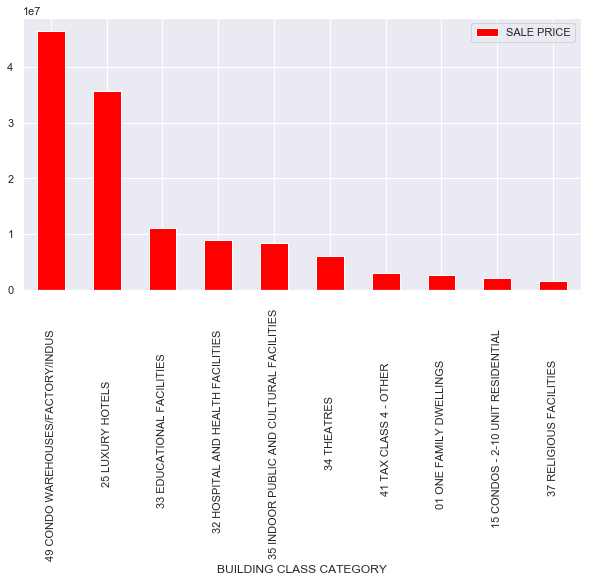

In [880]:
pivot2bi.plot(kind='bar',color='Red')

#### TAX CLASS AT PRESENT

In [553]:
#TAX CLASS AT PRESENT
df2['TAX CLASS AT PRESENT'].unique()


array(['1', '2', '2A', '2B', '2C', '4', '1C', '1A', '3', ' '],
      dtype=object)

In [554]:
pivot3=df2.pivot_table(index='TAX CLASS AT PRESENT',values='SALE PRICE',aggfunc=np.median)
pivot3

,SALE PRICE
TAX CLASS AT PRESENT,
,0.0
1,1462500.0
1A,287000.0
1C,1651322.5
2,840000.0
2A,0.0
2B,0.0
2C,1257500.0
3,0.0


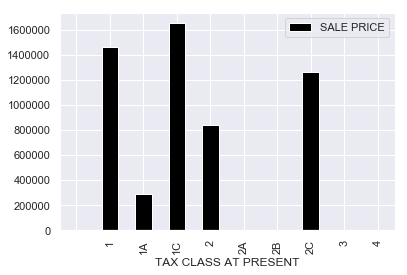

In [555]:
pivot3.plot(kind='bar',color='black')

#### TAX CLASS AT TIME OF SALE

In [556]:
#TAX CLASS AT TIME OF SALE
df2['TAX CLASS AT TIME OF SALE'].unique()

[1, 2, 4, 3]
Categories (4, object): [1, 2, 4, 3]

In [559]:
pivot4=df2.pivot_table(index='TAX CLASS AT TIME OF SALE',values='SALE PRICE',aggfunc=np.median)
pivot4

,SALE PRICE
TAX CLASS AT TIME OF SALE,
1,1374819.0
2,845000.0
3,0.0
4,0.0


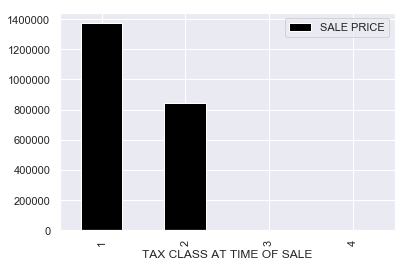

In [560]:
pivot4.plot(kind='bar',color='black')

#### SALE DATE

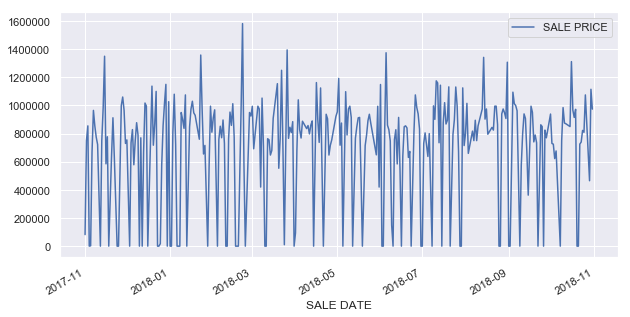

In [614]:
df2['SALE DATE'].nunique()
pivot5=df2.pivot_table(index='SALE DATE',values='SALE PRICE',aggfunc=np.median)
p5=pivot5.sort_values('SALE PRICE',ascending=False).head(10)
pivot5.plot()

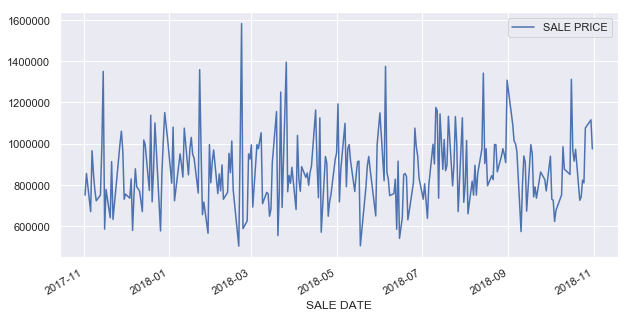

In [881]:
pivot5[(pivot5['SALE PRICE']!=0)&(pivot5['SALE PRICE']>500000)].plot()

# 4. Data Processing

In [617]:
#Data pre processing
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16837 entries, 5 to 16841
Data columns (total 22 columns):
BOROUGH                           16837 non-null category
NEIGHBORHOOD                      16837 non-null object
BUILDING CLASS CATEGORY           16837 non-null object
TAX CLASS AT PRESENT              16837 non-null object
BLOCK                             16837 non-null float64
LOT                               16837 non-null float64
EASE-MENT                         16837 non-null object
BUILDING CLASS AT PRESENT         16837 non-null object
ADDRESS                           16837 non-null object
APARTMENT NUMBER                  16837 non-null object
ZIP CODE                          16837 non-null float64
RESIDENTIAL UNITS                 16837 non-null float64
COMMERCIAL UNITS                  16837 non-null float64
TOTAL UNITS                       16837 non-null float64
LAND SQUARE FEET                  16837 non-null float64
GROSS SQUARE FEET                 16837 no

In [618]:
numeric_df2.columns

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE'],
      dtype='object')

In [627]:
#transform the numeric features using log(x+1)
from scipy.stats import skew
skewed=df2[numeric_df2.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed=skewed[skewed>0.7]
skewed=skewed.index
df2[skewed]=np.log1p(df2[skewed])

In [724]:
scaler=StandardScaler()
scaler.fit(df2[numeric_df2.columns])
scaled=scaler.transform(df2[numeric_df2.columns])

for i, col in enumerate(numeric_df2.columns):
    df2[col] = scaled[:,i]

In [767]:
df2.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,TAX CKASS AT PRESENT
5,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,-1.393663,-0.748590,,A4,189 EAST 7TH STREET,,...,-0.067356,-0.075409,0.121173,-0.022046,0.237449,1,A4,0.070982,2018-05-22,1
6,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,-1.393663,-0.748590,,A4,189 EAST 7TH STREET,,...,-0.067356,-0.075409,0.121173,-0.022046,0.237449,1,A4,-0.108807,2018-05-23,1
7,1.0,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,-1.393663,-0.776185,,B1,113 AVENUE C,,...,-0.067356,0.000112,0.181542,0.057869,0.297491,1,B1,-0.108807,2018-04-25,1
8,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,-1.403088,-0.811209,,C7,21-23 AVENUE B,,...,0.965963,1.057408,0.957195,0.238197,0.299031,2,C7,0.275278,2018-09-07,2
9,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,-1.395548,-0.794227,,C1,200 EAST 7TH STREET,,...,-0.067356,1.208450,0.456732,0.240117,0.314426,2,C1,0.076741,2018-09-05,2


In [635]:
#Hot features categorical columns
hot_features=['NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']

In [636]:
#Convert categorical variables into dummy/indicator variables
hot_encoded=pd.get_dummies(df2[hot_features])
hot_encoded.info(verbose=True,memory_usage=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16837 entries, 5 to 16841
Data columns (total 97 columns):
NEIGHBORHOOD_ALPHABET CITY                                              16837 non-null uint8
NEIGHBORHOOD_CHELSEA                                                    16837 non-null uint8
NEIGHBORHOOD_CHINATOWN                                                  16837 non-null uint8
NEIGHBORHOOD_CIVIC CENTER                                               16837 non-null uint8
NEIGHBORHOOD_CLINTON                                                    16837 non-null uint8
NEIGHBORHOOD_EAST VILLAGE                                               16837 non-null uint8
NEIGHBORHOOD_FASHION                                                    16837 non-null uint8
NEIGHBORHOOD_FINANCIAL                                                  16837 non-null uint8
NEIGHBORHOOD_FLATIRON                                                   16837 non-null uint8
NEIGHBORHOOD_GRAMERCY                                 

In [768]:
df2d=df2.drop(hot_features,axis=1)
df2d=pd.concat([df2d,hot_encoded],axis=1)

In [769]:
#Drop some columns
del df2d['BOROUGH']
del df2d['EASE-MENT']
del df2d['BUILDING CLASS AT PRESENT']
del df2d['ADDRESS']
del df2d['APARTMENT NUMBER']
del df2d['BUILDING CLASS AT TIME OF SALE']
del df2d['SALE DATE']
del df2d['TAX CKASS AT PRESENT']

In [742]:
df2d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16837 entries, 5 to 16841
Columns: 107 entries, BLOCK to TAX CLASS AT TIME OF SALE_TAX CLASS AT TIME OF SALE
dtypes: float64(10), uint8(97)
memory usage: 3.0 MB


In [778]:
#Train/Test Split
Y_df2d=df2d['SALE PRICE']
X_df2d=df2d.drop('SALE PRICE',axis=1)

X_df2d.shape , Y_df2d.shape


((16837, 106), (16837,))

In [779]:
X_train, X_test, Y_train, Y_test=train_test_split(X_df2d,Y_df2d,test_size=0.3,random_state=34)

In [780]:
#Training set
X_train.shape, Y_train.shape

((11785, 106), (11785,))

In [770]:
#Testing set
X_test.shape, Y_test.shape

((5052, 106), (5052,))

# 5. Modeling

In [754]:
#Modeling
#Root-mean-square-error
def rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

### Linear Regression

In [805]:
#Linear regression
linreg=LinearRegression(normalize=True)
linreg.fit(X_train, Y_train)
Y_pred_lin=linreg.predict(X_test)
rmse(Y_test,Y_pred_lin)


11085230610.8893

In [806]:
cv_scores_linreg=cross_val_score(linreg, X_train, Y_train, cv=5)
cv_scores_linreg

array([-1.86719871e+26, -3.29486926e+00, -1.02544433e+22, -9.79041635e+20,
       -1.81319140e+19])

### Ridge Regression

In [782]:
#Ridge regression
ridge = Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train, Y_train)
Y_pred_ridge=ridge.predict(X_test)
rmse(Y_test,Y_pred_ridge)

0.6412299558759209

In [799]:
cv_scores_ridge=cross_val_score(ridge,X_train,Y_train,cv=5)
cv_scores_ridge

array([-0.36388985, -2.50475646,  0.24397749, -1.84107642,  0.0842301 ])

### Lasso Regression

In [783]:
#Lasso regression
lasso_regr=Lasso(alpha=0.00099,max_iter=50000)
lasso_regr.fit(X_train,Y_train)
Y_pred_lasso=lasso_regr.predict(X_test)
rmse(Y_test,Y_pred_lasso)

0.6290908373077869

In [801]:
cv_scores_lasso=cross_val_score(lasso_regr,X_train,Y_train,cv=5)
cv_scores_lasso

array([-0.3896553 , -2.51935341,  0.25010694, -3.21762533,  0.071962  ])

### Random Forest Regressor

In [785]:
#Randomforest regressor
rf_regr=RandomForestRegressor()
rf_regr.fit(X_train,Y_train)
Y_pred_rf=rf_regr.predict(X_test)
rmse(Y_test,Y_pred_rf)

0.6836484044366712

In [803]:
cv_scores_rf=cross_val_score(rf_regr,X_train,Y_train,cv=5)
cv_scores_rf

array([-0.5733121 , -3.31335929,  0.36402995,  0.11415997, -0.18444155])

#### Figure important features of Random Forest

In [899]:
imfea=pd.DataFrame(list(zip(X_train.columns,np.transpose(rf_regr.feature_importances_))) \
                  ).sort_values(1,ascending=False)
imfea1=imfea.head(10)
imfea1

,0,1
7,GROSS SQUARE FEET,0.342006
6,LAND SQUARE FEET,0.247475
33,NEIGHBORHOOD_MIDTOWN WEST,0.069295
2,ZIP CODE,0.065958
0,BLOCK,0.049401
68,BUILDING CLASS CATEGORY_25 LUXURY HOTELS ...,0.035283
1,LOT,0.034279
4,COMMERCIAL UNITS,0.022167
76,BUILDING CLASS CATEGORY_34 THEATRES ...,0.021936
8,YEAR BUILT,0.020950


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

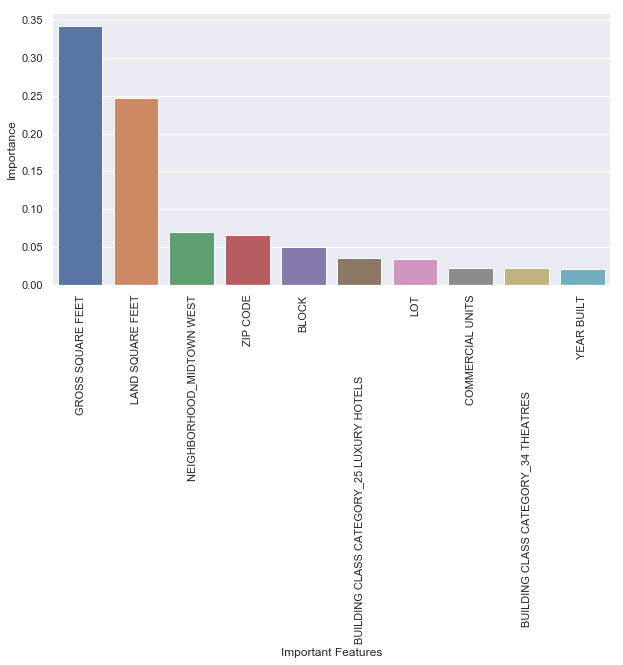

In [1010]:
imfea1=imfea1.rename(columns={0:'Important Features',1:'Importance'})
sns.barplot(x=imfea1['Important Features'],y=imfea1['Importance'],data=imfea1)
plt.xticks(rotation=90)

### Statistical Tests

In [1052]:
from statsmodels.stats import weightstats as weightstats
weightstats.ttest_ind(gsqf,lsqf,alternative='larger')

(array([9.46221315, 0.        ]), array([1.601856e-21, 5.000000e-01]), 33672.0)

In [1059]:
weightstats.ztest(gsqf,lsqf)

(array([9.46221315, 0.        ]), array([3.01493231e-21, 1.00000000e+00]))

In [1094]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

y=df['GROSS_SQUARE_FEET']
X=df['SALE_PRICE']
X=sm.add_constant(X)
X.head()
results=smf.ols('y~X',data=df).fit()
print(results.params)



Intercept    558.078505
X[0]         558.078506
X[1]           0.000607
dtype: float64


In [1096]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     5800.
Date:                Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:36:19   Log-Likelihood:            -1.9621e+05
No. Observations:               16837   AIC:                         3.924e+05
Df Residuals:                   16835   BIC:                         3.924e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    558.0785    107.967      5.169      0.0

# 6. Conclusion

#### a. From the data modeling part, since the RMSE is the smallest for Lasso Regression with the value of 0.629, Lasso Regression works best for this dataset. 
#### b. By using Random Forest Regressor we can see that the top 10 most important features to influence the SALE PRICE. The feature of GROSS SQUARE FEET ranks the first, and LAND SQUARE FEET feature comes the next.
#### c. The R squared from the OLS Regression result is 0.256, which is not great but it's not that bad given the limited amount of data available. 